# Preparação dos Dados edX 2014

Importando dependências.

## Introdução

Esse documento visa limpar os dados padronizando tipos e removendo inconsistências relacionadas aos dados disponibilizados no dataset dos dados acadêmicos de MOOCs oferecidos pela plataforma edX, incluindo informações das interações dos usuários com os cursos e o resultado final dos mesmos nos cursos¹, os dados são analisados de acordo com os o dicionáro de dado oferecido pelos autores².

Além da limpeza dos dados, a preparação vai enriquecer esses dados com informações públicas disponíveis a respeito das instituições e cursos dispoíveis.

Referências:<br/> 
1 - MITx, & HarvardX. (2014). HarvardX-MITx Person-Course Academic Year 2013 De-Identified dataset, version 2.0. Harvard Dataverse. https://doi.org/10.7910/DVN/26147<br/>
2 - MITx, & HarvardX. (2014).Description of data sources and variables for the HarvardX-MITx Person-Course Academic Year 2013 De-identified Dataset.  Dipsonível em: https://dataverse.harvard.edu/file.xhtml?fileId=2468956&version=RELEASED&version=.0, Acessado em 01/05/2018.

## Importação de Bibliotecas

In [1]:
import numpy as np
np.__version__
#'1.14.0'


'1.16.2'

In [2]:
import pandas as pd
pd.__version__
#'0.22.0'

'0.24.2'

## Leitura do DataSet
Importando os dados conforme disponibilizados pela plataforma edX.

In [3]:
df = pd.read_csv('../data/raw/edx_2014.csv' )
df['grade'] = pd.to_numeric(df['grade'], errors='coerce')
df.head(10)

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,NaN,NaN,NaN,0.0,2012-12-19,2013-11-17,NaN,9.0,NaN,NaN,0,NaN,1.0
1,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,NaN,NaN,NaN,0.0,2012-10-15,NaN,NaN,9.0,NaN,1.0,0,NaN,1.0
2,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0.0,2013-02-08,2013-11-17,NaN,16.0,NaN,NaN,0,NaN,1.0
3,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0.0,2012-09-17,NaN,NaN,16.0,NaN,NaN,0,NaN,1.0
4,HarvardX/ER22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0.0,2012-12-19,NaN,NaN,16.0,NaN,NaN,0,NaN,1.0
5,HarvardX/PH207x/2012_Fall,MHxPC130275857,1,1,1,0,United States,NaN,NaN,NaN,0.0,2012-09-17,2013-05-23,502.0,16.0,50.0,12.0,0,NaN,NaN
6,HarvardX/PH278x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0.0,2013-02-08,NaN,NaN,16.0,NaN,NaN,0,NaN,1.0
7,HarvardX/CB22x/2013_Spring,MHxPC130539455,1,1,0,0,France,NaN,NaN,NaN,0.0,2013-01-01,2013-05-14,42.0,6.0,NaN,3.0,0,NaN,NaN
8,HarvardX/CB22x/2013_Spring,MHxPC130088379,1,1,0,0,United States,NaN,NaN,NaN,0.0,2013-02-18,2013-03-17,70.0,3.0,NaN,3.0,0,NaN,NaN
9,HarvardX/CS50x/2012,MHxPC130088379,1,1,0,0,United States,NaN,NaN,NaN,0.0,2012-10-20,NaN,NaN,12.0,NaN,3.0,0,NaN,1.0


## Dividindo Informações Codificadas no ID do Curso
O id de curso codifica informações da plataforma, do curso e do ano de realização da turma.
Vamos dividir essas *features* porque podem ser componentes importantes para análise, além de serem fontes de dados para enriquecimento com informações adicionais em relação à plataforma e curso.

**OBS:** A informação do semestre foi eliminada porque nenhum curso ocorre em semestres diferentes no mesmo ano.

In [4]:
df['platform'] = df['course_id'].map(lambda cid: cid.split('/')[0])
df['year'] = df['course_id'].map(lambda cid: cid.split('/')[2].split('_')[0])
df['course_id'] = df['course_id'].map(lambda cid: cid.split('/')[1])
df.head(10)


,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,...,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag,platform,year
0,CB22x,MHxPC130442623,1,0,0,0,United States,NaN,NaN,NaN,...,2013-11-17,NaN,9.0,NaN,NaN,0,NaN,1.0,HarvardX,2013
1,CS50x,MHxPC130442623,1,1,0,0,United States,NaN,NaN,NaN,...,NaN,NaN,9.0,NaN,1.0,0,NaN,1.0,HarvardX,2012
2,CB22x,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,...,2013-11-17,NaN,16.0,NaN,NaN,0,NaN,1.0,HarvardX,2013
3,CS50x,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,...,NaN,NaN,16.0,NaN,NaN,0,NaN,1.0,HarvardX,2012
4,ER22x,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,...,NaN,NaN,16.0,NaN,NaN,0,NaN,1.0,HarvardX,2013
5,PH207x,MHxPC130275857,1,1,1,0,United States,NaN,NaN,NaN,...,2013-05-23,502.0,16.0,50.0,12.0,0,NaN,NaN,HarvardX,2012
6,PH278x,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,...,NaN,NaN,16.0,NaN,NaN,0,NaN,1.0,HarvardX,2013
7,CB22x,MHxPC130539455,1,1,0,0,France,NaN,NaN,NaN,...,2013-05-14,42.0,6.0,NaN,3.0,0,NaN,NaN,HarvardX,2013
8,CB22x,MHxPC130088379,1,1,0,0,United States,NaN,NaN,NaN,...,2013-03-17,70.0,3.0,NaN,3.0,0,NaN,NaN,HarvardX,2013
9,CS50x,MHxPC130088379,1,1,0,0,United States,NaN,NaN,NaN,...,NaN,NaN,12.0,NaN,3.0,0,NaN,1.0,HarvardX,2012


## Enriquecendo Dados de Plataforma

Dos dados de plataforma não tem nenhum dado contextual disponível publicamente (DBPedia e Wikipedia)

http://dbpedia.org/page/Massachusetts_Institute_of_Technology <br />
http://dbpedia.org/page/Harvard_University

## Enriquecendo Dados de Curso

Os dados de curso do DataSet e as informações do Dicionário de dados permitem que os dados sejam enriquecidos com dados de nome, descrição, duração, dedicação necessário, entre outras.

A partir dessas informações adicionais os cursos podem ser relacionas como forma de facilitar a predição de informações a respeito do desempenho dos estudantes.

https://www.edx.org/course/justice-harvardx-er22-1x-2 <br />
https://www.edx.org/course/cs50s-introduction-computer-science-harvardx-cs50x <br />
https://www.edx.org/course/health-numbers-quantitative-methods-harvardx-ph207x <br />
https://www.edx.org/course/human-health-global-environmental-change-harvardx-ph278x <br />
https://www.edx.org/course/the-challenges-of-global-poverty <br />
https://www.edx.org/course/elements-structures-mitx-2-01x-2<br />
https://www.edx.org/course/introduction-solid-state-chemistry-mitx-3-091x-5 <br />
https://www.edx.org/course/circuits-electronics-1-basic-circuit-mitx-6-002-1x-0 <br />
https://www.edx.org/course/introduction-computer-science-mitx-6-00-1x-11<br />
https://www.edx.org/course/introduction-biology-secret-life-mitx-7-00x-7<br />
https://www.edx.org/course/mechanics-review-mitx-8-mrevx<br />
https://www.coursetalk.com/providers/edx/courses/802x-electricity-and-magnetism-2 <br />
https://www.edx.org/course/ancient-greek-hero-harvardx-cb22x


In [6]:
course_enrich = {
    'ER22x': {
        'Name': 'Justice',
        'Summary': "HarvardX is proud to relaunch this introduction to Justice with new videos and discussion forums in multiple languages!Taught by lauded Harvard professor Michael Sandel, Justice explores critical analysis of classical and contemporary theories of justice, including discussion of present-day applications. Topics include affirmative action, income distribution, same-sex marriage, the role of markets, debates about rights (human rights and property rights), arguments for and against equality, dilemmas of loyalty in public and private life. The course invites learners to subject their own views on these controversies to critical examination.The principal readings for the course are texts by Aristotle, John Locke, Immanuel Kant, John Stuart Mill, and John Rawls. Other assigned readings include writings by contemporary philosophers, court cases, and articles about political controversies that raise philosophical questions.Closed Captioning and discussion forums are available in Chinese, German, Portuguese, and Spanish.HarvardX requires individuals who enroll in its courses on edX to abide by the terms of the edX honor code. HarvardX will take appropriate corrective action in response to violations of the edX honor code, which may include dismissal from the HarvardX course; revocation of any certificates received for the HarvardX course; or other remedies as circumstances warrant. No refunds will be issued in the case of corrective action for such violations. Enrollees who are taking HarvardX courses as part of another program will also be governed by the academic policies of those programs.HarvardX pursues the science of learning. By registering as an online learner in an HX course, you will also participate in research about learning. Read our research statement to learn more.Harvard University and HarvardX are committed to maintaining a safe and healthy educational and work environment in which no member of the community is excluded from participation in, denied the benefits of, or subjected to discrimination or harassment in our program. All members of the HarvardX community are expected to abide by Harvard policies on nondiscrimination, including sexual harassment, and the edX Terms of Service. If you have any questions or concerns, please contact harvardx@harvard.edu and/or report your experience through the edX contact form.What you'll learnThe fundamentals of political philosophyAn understanding of social justice and criminal justice, and the roles they play in the modern justice systemA deeper sense of the philosophy that underlies modern issues such as affirmative action, same sex marriage, and equalityThe ability to better articulate and evaluate philosophical arguments and ask philosophical questions",
        'Length': 12,
        'Effort': 6,
        'Price': 0,
        'Certification Option': False,
        'Subject': 'Humanities',
        'Level': ' Introductory',
        'Language': 'English',
        'Video Transcripts': ['Deutsch', 'English', 'Spanish', 'Portuguese', 'Chinese']
    },
    'CS50x': {
        'Name': 'Introduction to Computer Science',
        'Summary': "This is CS50x, Harvard University's introduction to the intellectual enterprises of computer science and the art of programming for majors and non-majors alike, with or without prior programming experience. An entry-level course taught by David J. Malan, CS50x teaches students how to think algorithmically and solve problems efficiently. Topics include abstraction, algorithms, data structures, encapsulation, resource management, security, software engineering, and web development. Languages include C, Python, SQL, and JavaScript plus CSS and HTML. Problem sets inspired by real-world domains of biology, cryptography, finance, forensics, and gaming. The on-campus version of CS50x, CS50, is Harvard's largest course.Students who earn a satisfactory score on 9 problem sets (i.e., programming assignments) and a final project are eligible for a certificate. This is a self-paced course–you may take CS50x on your own schedule.HarvardX requires individuals who enroll in its courses on edX to abide by the terms of the edX honor code. HarvardX will take appropriate corrective action in response to violations of the edX honor code, which may include dismissal from the HarvardX course; revocation of any certificates received for the HarvardX course; or other remedies as circumstances warrant. No refunds will be issued in the case of corrective action for such violations. Enrollees who are taking HarvardX courses as part of another program will also be governed by the academic policies of those programs.HarvardX pursues the science of learning. By registering as an online learner in an HX course, you will also participate in research about learning. Read our research statement to learn more.Harvard University and HarvardX are committed to maintaining a safe and healthy educational and work environment in which no member of the community is excluded from participation in, denied the benefits of, or subjected to discrimination or harassment in our program. All members of the HarvardX community are expected to abide by Harvard policies on nondiscrimination, including sexual harassment, and the edX Terms of Service. If you have any questions or concerns, please contact harvardx@harvard.edu and/or report your experience through the edX contact form.What you'll learnA broad and robust understanding of computer science and programmingHow to think algorithmically and solve programming problems efficientlyConcepts like abstraction, algorithms, data structures, encapsulation, resource management, security, software engineering, and web developmentFamiliarity in a number of languages, including C, Python, SQL, and JavaScript plus CSS and HTMLHow to engage with a vibrant community of like-minded learners from all levels of experienceHow to develop and present a final programming project to your peers",
        'Length': 12,
        'Effort': 16,
        'Certification Option': True,
        'Price': 0,
        'Subject': 'Computer Science',
        'Level': ' Introductory',
        'Language': 'English',
        'Video Transcripts': ['English']
    },
    'PH207x': {
        'Name': 'Health in Numbers: Quantitative Methods in Clinical & Public Health Research',
        'Summary': "Quantitative Methods in Clinical and Public Health Research is the online adaptation of material from the Harvard T.H. Chan School of Public Health's classes in epidemiology and biostatistics. Principled investigations to monitor and thus improve the health of individuals are firmly based on a sound understanding of modern quantitative methods. This involves the ability to discover patterns and extract knowledge from health data on a sample of individuals and then to infer, with measured uncertainty, the unobserved population characteristics. This course will address this need by covering the principles of biostatistics and epidemiology used for public health and clinical research. These include outcomes measurement, measures of associations between outcomes and their determinants, study design options, bias and confounding, probability and diagnostic tests, confidence intervals and hypothesis testing, power and sample size determinations, life tables and survival methods, regression methods (both, linear and logistic), and sample survey techniques. Students will analyze sample data sets to acquire knowledge of appropriate computer software. By the end of the course the successful student should have attained a sound understanding of these methods and a solid foundation for further study. FAQHow much does it cost to take the course?Nothing! The course is free.When will assignments be due?The course is organized into weeks, and each week will have its own set of assignments. Students will be expected to complete their homework each week.Do I need any other materials to take the course?Nope, as long as you’ve got a Mac or PC, you’ll be ready to take the course.Will the course use any textbooks or software?Yes! We'll have free access to the book \"Principles of Biostatistics\" written by Marcello Pagano (one of the Professors) and Kimberlee Gauvreau.In addition to the textbook, we'll use Stata (a piece of software for doing statistical analysis).Thanks to our friends at Statacorp, we'll have free copies of Stata available for all students to use for the duration of the course (Mac and PC only).Do I need to watch the lectures live?No. You can watch the lectures at your leisure.Will certificates be awarded?Yes. Online learners who achieve a passing grade in a course can earn a certificate of achievement. These certificates will indicate you have successfully completed the course, but will not include a specific grade. Certificates will be issued by edX under the name of either HarvardX, MITx or BerkeleyX, designating the institution from which the course originated. For the courses in Fall 2012, honor code certificates will be free.HarvardX requires individuals who enroll in its courses on edX to abide by the terms of the edX honor code : https://www.edx.org/edx-terms-service. HarvardX will take appropriate corrective action in response to violations of the edX honor code, which may include dismissal from the HarvardX course; revocation of any certificates received for the HarvardX course; or other remedies as circumstances warrant. No refunds will be issued in the case of corrective action for such violations. Enrollees who are taking HarvardX courses as part of another program will also be governed by the academic policies of those programs.HarvardX pursues the science of learning. By registering as an online learner in an HX course, you will also participate in research about learning. Read our research statement : http://harvardx.harvard.edu/research-statement to learn more.Harvard University and HarvardX are committed to maintaining a safe and healthy educational and work environment in which no member of the community is excluded from participation in, denied the benefits of, or subjected to discrimination or harassment in our program. All members of the HarvardX community are expected to abide by Harvard policies on nondiscrimination, including sexual harassment, and the edX Terms of Service. If you have any questions or concerns, please contact harvardx@harvard.edu and/or report your experience through the edX contact form : https://www.edx.org/contact-us. What you'll learnHow to analyze data sets using modern quantitative methodsHow to discover patterns and extract knowledge from health dataThe principles of biostatistics and epidemiology used for public health and clinical research, including: outcomes measurement, study design options -bias and confounding, probability and diagnostic tests, confidence intervals and hypothesis testing, power and sample size determinations, life tables and survival methods, regression methods (both, linear and logistic) and sample survey techniques",
        'Length': 13,
        'Effort': 10,
        'Certification Option': None,
        'Price': 0,
        'Subject': 'Health & Safety',
        'Level': 'Intermediate',
        'Language': 'English',
        'Video Transcripts': ['English']
    },
    'PH278x': {
        'Name': 'Human Health and Global Environmental Change',
        'Summary': "PH278x explores global environmental changes, examining their causes as well as their health consequences, and engages students in thinking about their solutions.One of the greatest challenges of our time is to address global environmental changes, such as climate change and biodiversity loss, that may harm the health of billions of people worldwide. This class will examine these changes, their causes, as well as their health consequences, and engage students in thinking about their solutions.",
        'Length': 12,
        'Effort': None,
        'Certification Option': None,
        'Price': 0,
        'Subject': 'Environmental Studies',
        'Level': 'Introductory',
        'Language': 'English',
        'Video Transcripts': []
    },
    '14.73x': {
        'Name': 'The Challenges of Global Poverty',
        'Summary': "This course is part of the new MITx MicroMasters program in Data, Economics, and Development Policy (DEDP). To enroll in the MicroMasters track or to learn more about this program and how it integrates with MIT’s new blended Master’s degree, please visit the MicroMasters portal. This is a course for those who are interested in the challenge posed by massive and persistent world poverty, and are hopeful that economists might have something useful to say about this challenge. The questions we will take up include: Is extreme poverty a thing of the past? What is economic life like when living under a dollar per day? Are the poor always hungry? How do we make schools work for poor citizens? How do we deal with the disease burden? Is microfinance invaluable or overrated? Without property rights, is life destined to be \"nasty, brutish and short\"? Should we leave economic development to the market? Should we leave economic development to non-governmental organizations (NGOs)? Does foreign aid help or hinder? Where is the best place to intervene? And many others.At the end of this course, you should have a good sense of the key questions asked by scholars interested in poverty today, and hopefully a few answers as well.What you'll learnTo identify and analyze some of the root causes of underdevelopment using principles of economicsTo understand the unique constraints and trade-offs the poor face when making decisionsHow to interpret the findings of empirical research that evaluates the effectiveness of anti-poverty strategies, policies, and interventions (including strengths and weaknesses of research)A basic understanding of various econometric tools used in development research, which will provide the foundation for participating in more technical courses in development economics",
        'Length': 12,
        'Effort': 14,
        'Certification Option': None,
        'Price': 0,
        'Subject': 'Social Sciences',
        'Level': 'Introductory',
        'Language': 'English',
        'Video Transcripts': ['English']
    },
    '2.01x': {
        'Name': 'Elements of Structures',
        'Summary': "2.01x introduces principles of structural analysis and strength of materials in applications to three essential types of elastic load-bearing elements: bars in axial loading, axisymmetric shafts in torsion, and symmetric beams in bending. The course covers fundamental concepts of continuum mechanics, including internal resultants, displacement field, stress, and strain.While emphasizing analytical techniques, the course also provides an introduction to computing environments (MATLAB) and numerical methods (Finite Elements). This is the first course in a 3-part series. In this series you will learn how mechanical engineers can use analytical methods and “back of the envelope” calculations to predict structural behavior.  The three courses in the series are:Part 1 – 2.01x: Elements of Structures. (Elastic response of Structural Elements: Bars, Shafts, Beams).Part 2 – 2.02.1x Mechanics of Deformable Structures: Part 1. (Assemblages of Elastic, Elastic-Plastic, and Viscoelastic Structural Elements). Next session starts January 2018.Part 3 – 2.02.2x Mechanics of Deformable Structures: Part 2. (Multi-axial Loading and Deformation. Energy Methods). Next session starts October 2018.These courses are based on the first subject in solid mechanics for MIT Mechanical Engineering students. Join them and learn to rely on the notions of equilibrium, geometric compatibility, and constitutive material response to ensure that your structures will perform their specified mechanical function without failing.What you'll learnIn 2.01x you will:Use free body diagrams to formulate equilibrium equations;Identify geometric constraints to formulate compatibility equations;Understand the concepts of stress and strain at a material point.For three fundamental types of slender structural elements (elastic bars, beams and shafts) you will learn:to calculate internal stress and strain fields in the loaded elements;to predict the deformation in the loaded elements;to design structural elements so as to prevent failure;to use numerical methods (MATLAB) in structural engineering application.",
        'Length': 12,
        'Effort': 14,
        'Certification Option': False,
        'Price': 0,
        'Subject': 'Engineering',
        'Level': 'Intermediate',
        'Language': 'English',
        'Video Transcripts': ['English']
    },
    '3.091x': {
        'Name': 'Introduction to Solid State Chemistry',
        'Summary': "This first-year University chemistry course explores the basic principles of the chemical bond by studying the properties of solids. Properties such as stiffness, electrical conductivity, thermal expansion, strength, and optical properties are the vehicle by which you can learn a great deal of practical chemistry. You will see how experts use their knowledge of trends in the periodic table to predict the properties of materials. 3.091x is an engineering course so there is an emphasis on applications and how materials are used. The on-campus version of the course has been taught for over forty years and is one of the largest classes at MIT.This course will cover the relationship between electronic structure, chemical bonding, and atomic order, and characterization of atomic arrangements in crystalline and amorphous solids: metals, ceramics, semiconductors, and polymers (including proteins). There will be topical coverage of organic chemistry, solution chemistry, acid-base equilibria, electrochemistry, biochemistry, chemical kinetics, diffusion, and phase diagrams. Examples will be drawn from industrial practice (including the environmental impact of chemical processes), from energy generation and storage (e.g., batteries and fuel cells), and from emerging technologies (e.g., photonic and biomedical devices). What you'll learnYou will develop your “chemical intuition” A quantitative understanding of chemical principlesUnderstanding of crystal structure and its relationship to propertiesMaterials properties such as conductivity, optical transmission, stiffness, thermal expansion, and strengthAn understanding of electronic structure, chemical bonding, and atomic order and arrangements",
        'Length': 15,
        'Effort': 12,
        'Certification Option': False,
        'Price': 0,
        'Subject': 'Chemistry',
        'Level': 'Introductory',
        'Language': 'English',
        'Video Transcripts': ['English']
    },
    '6.002x': {
        'Name': 'Circuits and Electronics 1: Basic Circuit Analysis',
        'Summary': "Want to learn about circuits and electronics, but unsure where to begin? Wondering how to make computers run faster or your mobile phone battery last longer? This free circuit course taught by edX CEO and MIT Professor Anant Agarwal and colleagues is for you.This is the first of three online Circuits & Electronics courses offered by Professor Anant Agarwal and colleagues at MIT, and is taken by all MIT Electrical Engineering and Computer Science (EECS) majors.Topics covered include: resistive elements and networks; circuit analysis methods including KVL, KCL and the node method; independent and dependent sources; linearity, superposition, Thevenin & Norton methods; digital abstraction, combinational gates; and MOSFET switches and small signal analysis. Design and lab exercises are also significant components of the course.Weekly coursework includes interactive video sequences, readings from the textbook, homework, online laboratories, and optional tutorials. The course will also have a final exam. This is a self-paced course, so there are no weekly deadlines. However, all assignments are due by June 15, 2019, when the course will close. Student Testimonials“Brilliant course! It's definitely the best introduction to electronics in Universe! Interesting material, clean explanations, well prepared quizzes, challenging homeworks and fun labs.” - Ilya“6.002x will be a classic in the field of online learning. It combines Prof. Agarwal's enthusiasm for electronics and education. The online circuit design program works very well. The material is difficult. I took the knowledge from the class and built an electronic cat feeder.” - Stan.What you'll learnHow to design and analyze circuits using the node method, superposition, and the Thevenin methodHow to employ lumped circuit models and abstraction to simplify circuit analysisHow to use intuition to solve circuitsConstruction of simple digital gates using MOSFET transistorsMeasurement of circuit variables using tools such as virtual oscilloscopes, virtual multimeters, and virtual signal generators",
        'Length': 15,
        'Effort': 12,
        'Certification Option': True,
        'Price': 0,
        'Subject': 'Electronics',
        'Level': 'Introductory',
        'Language': 'English',
        'Video Transcripts': ['English', 'Chinese']
    },
    '6.00x': {
        'Name': 'Introduction to Computer Science and Programming Using Python',
        'Summary': "This course is the first of a two-course sequence: Introduction to Computer Science and Programming Using Python, and Introduction to Computational Thinking and Data Science. Together, they are designed to help people with no prior exposure to computer science or programming learn to think computationally and write programs to tackle useful problems. Some of the people taking the two courses will use them as a stepping stone to more advanced computer science courses, but for many it will be their first and last computer science courses. This run features updated lecture videos, lecture exercises, and problem sets to use the new version of Python 3.5. Even if you took the course with Python 2.7, you will be able to easily transition to Python 3.5 in future courses, or enroll now to refresh your learning.Since these courses may be the only formal computer science courses many of the students take, we have chosen to focus on breadth rather than depth. The goal is to provide students with a brief introduction to many topics so they will have an idea of what is possible when they need to think about how to use computation to accomplish some goal later in their career. That said, they are not \"computation appreciation\" courses. They are challenging and rigorous courses in which the students spend a lot of time and effort learning to bend the computer to their will.What you'll learnA Notion of computationThe Python programming languageSome simple algorithmsTesting and debuggingAn informal introduction to algorithmic complexityData structures",
        'Length': 9,
        'Effort': 15,
        'Certification Option': True,
        'Price': 0,
        'Subject': 'Computer Science',
        'Level': 'Introductory',
        'Language': 'English',
        'Video Transcripts': ['English']
    },
    '7.00x': {
        'Name': 'Introduction to Biology - The Secret of Life',
        'Summary': "Read fully to understand the verified-certificate option. Join Professor Eric Lander and the MITx Biology team in this unique introductory biology learning experience. All 7.00x course materials are available here for exploration and completion, including video and interactive problem sets and exams for skill building. We strongly encourage you to work through the activities, towards a goal of learning biology. We have optimized the course settings for learning: instant feedback after trying problems and all content available at all times. We offer a rigorous means of certifying edX learners in their mastery of the MITx introductory biology content, through the MITx 7.00x Introduction to Biology Competency Exam. This exciting option is available ONLY to those who register for the verified-certificate track, and successful completion of this exam is the only assessment that counts toward a certificate. We highly recommend preparing for the Competency Exam certification by using the current course materials and MIT OpenCourseWare problems. The next Competency Exam will be open February 20, 2018 to February 27, 2018.7.00x is an introductory level biology course hosted by professor Eric Lander, who was one of the leaders of the Human Genome Project. The course content reflects the topics taught in the MIT introductory biology courses and many biology courses across the world. As a learner, you will first focus on the structure and function of macromolecules such as DNA, RNA and proteins. You will discover how changes in the structure of some of these macromolecules alter their functions and what the implications of such changes have on human health. As you continue in the course, you will apply an understanding of heredity and information flow within cells to human health and disease and will learn about molecular biological techniques and their potential to impact our changing world. After you complete this course, you will have a foundation in biology that will allow you to understand the remarkable medical revolution going on today.MITx 7.00x: Introduction to Biology – The Secret of Life will let you explore the mysteries of biochemistry, genetics, molecular biology, recombinant DNA technology and genomics, and rational medicine. We are excited to take this journey with you!What you'll learnHow to describe the building blocks of life and how their interactions dictate structure and function in biologyHow to predict genotypes and phenotypes given genetics dataHow to explain the central dogma of molecular biology and convert DNA sequence to RNA sequence to protein sequenceHow to use molecular tools to study biologyHow to describe the principles of early sequencing as well as modern sequencing and the effects of these technologies on the filed of genomicsHow to apply the principles of modern biology to issues in today's society",
        'Length': 12,
        'Effort': 14,
        'Certification Option': False,
        'Price': 0,
        'Subject': 'Biology & Life Sciences',
        'Level': 'Introductory',
        'Language': 'English',
        'Video Transcripts': ['English', 'Chinese']
    },
    '8.MReV': {
        'Name': 'Mechanics ReView',
        'Summary': "Mechanics ReView is a second look at introductory Newtonian Mechanics. It will give you a unified overview of mechanics that will dramatically increase your problem-solving ability. It is open to all students who meet the prerequisites (see right), but is especially designed for teachers and students who want to improve their existing understanding of mechanics.Newtonian mechanics is the study of how forces change the motion of objects. This course begins with force, and moves on to straight-line motion, momentum, mechanical energy, rotational motion, angular momentum, and harmonic oscillators. Optional units include planetary orbits and a unit whose problems require multiple concepts to be applied to obtain one solution.NOTE: New Section “Problem-solving Pedagogy”We have developed a special approach to organizing the physics content knowledge and for applying it when solving problems.  This approach is called “Modeling Applied to Problem Solving” and has been researched carefully and has proven effectiveness for improving students’ performance in a later physics course on Electricity and Magnetism.If you are a teacher looking to improve your knowledge of mechanics, or to learn new approaches to teach your students, we encourage you to sign up in the special teacher section featuring a discussion forum for teachers to discuss teaching ideas and techniques related to the topics discussed in this course.  To join these discussions,  verify yourself as a teacher, and we will sign you up in the teacher forum.Note that this forum is exclusively reserved for teachers, so please do not register if you are not a teacher.Teachers in the United States, and especially in Massachusetts, can receive extra benefit from this course. We offer Professional Development Points (PDPs) at no charge to teachers in Massachusetts who complete our course. If you are in a different state, we instead offer Continuing Education Units through the American Association of Physics Teachers. There is a fee for this certificate.Course SyllabusNote: Taking this Course Involves Using Some Experimental MaterialsThe RELATE group that authors and administers this course is an education research group, dedicated to understanding and improving education, especially online.  We showed that 8.MReV generated slightly more conceptual learning than a conventionally taught on-campus course  - but we were unable to find exactly what caused this learning.   (So far this is the only published measurement of learning in a MOOC).  This summer we will be comparing learning from different types of online activities that  will be administerered to randomly assigned sub-groups of our students.  At certain points in the course, new vs. previously used sequences of activities will be assigned to different groups.  We will then use common questions to compare the amount learned. Which group receives the new activities will be switched so that neither group will have all new activities.Our experimental protocol has been approved by the MIT Committee on Use of Human Subjects.  As part of this approval we have the obligation to inform you about these experiments and to assure you that:We will not divulge any information about you that may be identified as yours personally (e.g. a discussion post showing your user name). The grade for obtaining a certificate will be adjusted downwards (from 60%) to compensate if one group has harder materials.Note: By clicking on the registration button, you indicate that you understand that everyone who participates in this course is randomly assigned to one of the groups described above. Welcome, and we hope you will both learn from and enjoy this course.FAQsIs there a required textbook?You do not need to buy a textbook. All material is included in this edX course and is viewable online. If you would like to use a textbook with the course (for example, as a reference), most calculus-level books are suitable. Introductory physics books by Young and Freedman, Halliday and Resnick, or Knight are all appropriate (and older editions are fine). What if I take a vacation?The course schedule is designed with this in mind! Course contents are released four weeks ahead of the deadline, so even if you have a four-week vacation, you do not need to miss any deadlines and can still complete all of the material. Will I get a certficiate?Yes! This course awards certificates to all who satisfactorily complete the required portion of the course. How are grades assigned?There are three parts of the course that are worth points: Checkpoint problems that are folded in with the reading, Homework problems that come at the end of each unit, and Quizzes that are at the end of every 1-2 units. Each is worth a varying number of points, and you will not have to do every problem.The course consists of 11 required units and three optional units. You do not need to complete the optional units in order to receive a certificate.There is no final exam.What you'll learnNewtonian Mechanics beyond a first-year introductory courseAngular momentum, planetary orbits, and harmonic motionA unified overview of the structure of MechanicsHow and when to apply conservation lawsExpert strategies to solve multi-concept problemsTo make measurements and do analyses of virtual experiments",
        'Length': 15,
        'Effort': 8,
        'Certification Option': False,
        'Price': 0,
        'Subject': 'Engineering',
        'Level': 'Introductory',
        'Language': 'English',
        'Video Transcripts': ['English']
    },
    '8.02x': {
        'Name': 'Electricity and Magnetism',
        'Summary': "The course is on electricity and magnetism which are at the heart of Maxwell's equations. We will study electric fields, magnetic fields, electromagnetic forces, conductors and dielectrics, electromagnetic waves, and the nature of light. This online version follows the MIT on-campus class as it was given by the renowned Professor Walter Lewin in the spring of 2002, and includes his video lectures and problem solving sessions. Professor Lewin, proclaimed \"a Web Star\" by The New York Times, has supplemented his lectures specifically for 8.02x by including interactive questions to help students check their understanding during the lectures themselves. Also, the course uses prize-winning animations and interactive simulations developed under the leadership of Professor John Belcher for MIT's Technology Enabled Active Learning (TEAL) classroom. In addition to the basic concepts of Electromagnetism, a vast variety of interesting topics are covered in this course including: Lightning, Electric Shock Treatment, Electrocardiograms, Metal Detectors, Musical Instruments, Magnetic Levitation, Bullet Trains, Electric Motors, Radios, TV, Car Coils, Superconductivity, Aurora Borealis, Rainbows, Radio Telescopes, Interferometers, Particle Accelerators such as the Large Hadron Collider, Mass Spectrometers, Red Sunsets, Blue Skies, Haloes around Sun and Moon, Color Perception, Doppler Effect, Big-Bang Cosmology. You will complete automatically graded weekly homework problems and a series of exams using multiple choice, numerical and symbolic questions to test your understanding and to help you master the material. Lectures are interspersed with questions that must be answered before advancing to the next lecture segment. There is a moderated forum for student-to-student threaded discussions. While homework deadlines will be strictly enforced, the lowest homework grade will be dropped. Your grade will be based on interactive questions during the lectures (5%), homework problems and simulations (20%), three midterm exams (15% each), and the final exam (30%). Depending on what percentage of all the points you get, your grade will be as follows: A (more than 85%), B (70-85%), C (60-70%). At least 60% of the points must be obtained to qualify for a certificate of mastery. ABOUT THE LECTURES Lewin's lectures at MIT are legendary. Many have been shown for over six years (starting in 1995) on UWTV in Seattle, reaching an audience of about four million people. For fifteen years (starting in 1983) he was on MIT Cable TV helping freshmen with their weekly homework assignments. His programs, which were aired 24 hours per day, were also frequently watched by upper-class students. Additionally, his 35 lectures on Newtonian Mechanics, 36 lectures on Electricity and Magnetism and 23 lectures on Vibrations and Waves can also be viewed at MIT'S OpenCourseWare, iTunes U, YouTube and Academic Earth. These lectures are being watched by about 5000 people daily from all over the world, that's about two million people per year! Many teachers show them regularly in their class rooms, and Bill Gates wrote Professor Lewin that he has watched all his lectures more than once, and that he learned a lot from them. The many responses that Professor Lewin receives daily are quite wonderful and often very moving.",
        'Length': 15,
        'Effort': 12,
        'Certification Option': None,
        'Price': 0,
        'Subject': 'Engineering',
        'Level': 'Intermediate',
        'Language': 'English',
        'Video Transcripts': []
    },
    'CB22x': {
        'Name': 'The Ancient Greek Hero',
        'Summary': "What is it to be human, and how can ancient concepts of the heroic and anti-heroic inform our understanding of the human condition? That question is at the core of The Ancient Greek Hero, which introduces (or reintroduces) students to the great texts of classical Greek culture by focusing on concepts of the Hero in an engaging, highly comparative way.The classical Greeks' concepts of Heroes and the \"heroic\" were very different from the way we understand the term today. In this course, students analyze Greek heroes and anti-heroes in their own historical contexts, in order to gain an understanding of these concepts as they were originally understood while also learning how they can inform our understanding of the human condition in general.In Greek tradition, a hero was a human, male or female, of the remote past, who was endowed with superhuman abilities by virtue of being descended from an immortal god. Rather than being paragons of virtue, as heroes are viewed in many modern cultures, ancient Greek heroes had all of the qualities and faults of their fellow humans, but on a much larger scale. Further, despite their mortality, heroes, like the gods, were objects of cult worship – a dimension which is also explored in depth in the course.The original sources studied in this course include the Homeric Iliad and Odyssey; tragedies of Aeschylus, Sophocles, and Euripides; songs of Sappho and Pindar; dialogues of Plato; historical texts of Herodotus; and more, including the intriguing but rarely studied dialogue \"On Heroes\" by Philostratus. All works are presented in English translation, with attention to the subtleties of the original Greek. These original sources are frequently supplemented both by ancient art and by modern comparanda, including opera and cinema (from Jacques Offenbach's opera Tales of Hoffman to Ridley Scott's science fiction classic Blade Runner).The true hero of the course is the logos (\"word\") of reasoned expression, as activated by Socratic dialogue. The logos of dialogue requires both careful thought and close (or \"slow\") reading, which is a core skill taught in this class. The course begins by considering the heroes of Homer's epics and ends with Plato's memories of the final days of Socrates -- memories which can only be fully understood by a reader who has gained a thorough comprehension of the ancient Greek hero in all his or her various manifestations.Using modern technology and engaging texts, The Ancient Greek Hero provides students who have no previous background in classical Greek civilization with a fully engaging and immediately accessible introduction to the most beautiful moments in this ancient literature, its myths, and its ritual practices.",
        'Length': 23,
        'Effort': 6,
        'Certification Option': None,
        'Price': 0,
        'Subject': 'History',
        'Level': 'Introductory',
        'Language': 'English',
        'Video Transcripts': []
    }
    
}

df['course_name'] = df['course_id'].map(lambda cid: course_enrich[cid]['Name'])
#df['course_summary'] = df['course_id'].map(lambda cid: course_enrich[cid]['Summary'])
df['course_length'] = df['course_id'].map(lambda cid: course_enrich[cid]['Length'])
df['course_effort'] = df['course_id'].map(lambda cid: course_enrich[cid]['Effort'])
df['course_has_certification'] = df['course_id'].map(lambda cid: course_enrich[cid]['Certification Option'])
df['course_subject'] = df['course_id'].map(lambda cid: course_enrich[cid]['Subject'])
df['course_level'] = df['course_id'].map(lambda cid: course_enrich[cid]['Level'])
df['course_language'] = df['course_id'].map(lambda cid: course_enrich[cid]['Language'])
df['course_transcript_en'] = df['course_id'].map(lambda cid: 'English' in course_enrich[cid]['Video Transcripts'])
df['course_transcript_pt'] = df['course_id'].map(lambda cid: 'Portuguese' in course_enrich[cid]['Video Transcripts'])
df['course_transcript_es'] = df['course_id'].map(lambda cid: 'Spanish' in course_enrich[cid]['Video Transcripts'])
df['course_transcript_de'] = df['course_id'].map(lambda cid: 'Deutsch' in course_enrich[cid]['Video Transcripts'])
df['course_transcript_cn'] = df['course_id'].map(lambda cid: 'Chinese' in course_enrich[cid]['Video Transcripts'])


df.head(10)





,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,...,course_effort,course_has_certification,course_subject,course_level,course_language,course_transcript_en,course_transcript_pt,course_transcript_es,course_transcript_de,course_transcript_cn
0,CB22x,MHxPC130442623,1,0,0,0,United States,NaN,NaN,NaN,...,6.0,None,History,Introductory,English,False,False,False,False,False
1,CS50x,MHxPC130442623,1,1,0,0,United States,NaN,NaN,NaN,...,16.0,True,Computer Science,Introductory,English,True,False,False,False,False
2,CB22x,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,...,6.0,None,History,Introductory,English,False,False,False,False,False
3,CS50x,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,...,16.0,True,Computer Science,Introductory,English,True,False,False,False,False
4,ER22x,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,...,6.0,False,Humanities,Introductory,English,True,True,True,True,True
5,PH207x,MHxPC130275857,1,1,1,0,United States,NaN,NaN,NaN,...,10.0,None,Health & Safety,Intermediate,English,True,False,False,False,False
6,PH278x,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,...,NaN,None,Environmental Studies,Introductory,English,False,False,False,False,False
7,CB22x,MHxPC130539455,1,1,0,0,France,NaN,NaN,NaN,...,6.0,None,History,Introductory,English,False,False,False,False,False
8,CB22x,MHxPC130088379,1,1,0,0,United States,NaN,NaN,NaN,...,6.0,None,History,Introductory,English,False,False,False,False,False
9,CS50x,MHxPC130088379,1,1,0,0,United States,NaN,NaN,NaN,...,16.0,True,Computer Science,Introductory,English,True,False,False,False,False


## Gerando Arquivo Pré-Processado

Gerando CSV com os dados pré-processados.

In [7]:
df.to_csv('../data/preprocessed/preprocessed_edx_2014_enriched.csv',index=False)

summaries = [{'course_id': i[0], 'course_summary': i[1]['Summary']} for i in course_enrich.items()]

df_summary = pd.DataFrame(summaries)
df_summary.to_csv('../data/preprocessed/edx_2014_summaries.csv', index=False)

## Separando Datasets

Gerando datasets a partir das 15 instâncias de curso-turma existentes no repositório.
- Dados para treino (10 curso/turma)
- Dados de teste (5 curso/turma)



In [8]:
%matplotlib inline
df['course_year'] =  df['course_id']+'_'+df['year']
course_years = df['course_year'].unique()

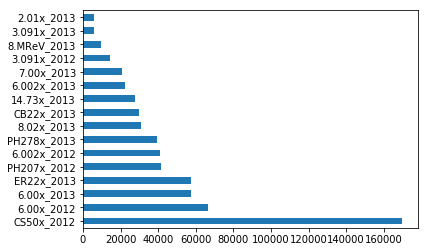

In [9]:
df['course_year'].value_counts(sort=True).plot.barh()

In [10]:
#import random
#random.shuffle(course_years)
#course_years

# First run result:
course_years = ['PH207x_2012',
                 '8.MReV_2013',
                 'CB22x_2013',
                 '8.02x_2013',
                 'ER22x_2013',
                 '6.002x_2012',
                 '6.00x_2013',
                 '2.01x_2013',
                 'CS50x_2012',
                 '7.00x_2013',
                 '3.091x_2013',
                 '6.002x_2013',
                 '3.091x_2012',
                 'PH278x_2013',
                 '6.00x_2012',
                 '14.73x_2013']

train = course_years[:10] 
test =  course_years[10:]



In [11]:
train

['PH207x_2012',
 '8.MReV_2013',
 'CB22x_2013',
 '8.02x_2013',
 'ER22x_2013',
 '6.002x_2012',
 '6.00x_2013',
 '2.01x_2013',
 'CS50x_2012',
 '7.00x_2013']

In [12]:
test

['3.091x_2013',
 '6.002x_2013',
 '3.091x_2012',
 'PH278x_2013',
 '6.00x_2012',
 '14.73x_2013']

In [13]:
train_df = df[df['course_year'].isin(train)]
train_df.head(10)

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,...,course_has_certification,course_subject,course_level,course_language,course_transcript_en,course_transcript_pt,course_transcript_es,course_transcript_de,course_transcript_cn,course_year
0,CB22x,MHxPC130442623,1,0,0,0,United States,NaN,NaN,NaN,...,None,History,Introductory,English,False,False,False,False,False,CB22x_2013
1,CS50x,MHxPC130442623,1,1,0,0,United States,NaN,NaN,NaN,...,True,Computer Science,Introductory,English,True,False,False,False,False,CS50x_2012
2,CB22x,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,...,None,History,Introductory,English,False,False,False,False,False,CB22x_2013
3,CS50x,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,...,True,Computer Science,Introductory,English,True,False,False,False,False,CS50x_2012
4,ER22x,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,...,False,Humanities,Introductory,English,True,True,True,True,True,ER22x_2013
5,PH207x,MHxPC130275857,1,1,1,0,United States,NaN,NaN,NaN,...,None,Health & Safety,Intermediate,English,True,False,False,False,False,PH207x_2012
7,CB22x,MHxPC130539455,1,1,0,0,France,NaN,NaN,NaN,...,None,History,Introductory,English,False,False,False,False,False,CB22x_2013
8,CB22x,MHxPC130088379,1,1,0,0,United States,NaN,NaN,NaN,...,None,History,Introductory,English,False,False,False,False,False,CB22x_2013
9,CS50x,MHxPC130088379,1,1,0,0,United States,NaN,NaN,NaN,...,True,Computer Science,Introductory,English,True,False,False,False,False,CS50x_2012
10,ER22x,MHxPC130088379,1,1,0,0,United States,NaN,NaN,NaN,...,False,Humanities,Introductory,English,True,True,True,True,True,ER22x_2013


In [16]:
test_df = df[df['course_year'].isin(test)]
test_df.head(10)

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,...,course_has_certification,course_subject,course_level,course_language,course_transcript_en,course_transcript_pt,course_transcript_es,course_transcript_de,course_transcript_cn,course_year
6,PH278x,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,...,None,Environmental Studies,Introductory,English,False,False,False,False,False,PH278x_2013
16,PH278x,MHxPC130024894,1,1,0,0,United States,NaN,NaN,NaN,...,None,Environmental Studies,Introductory,English,False,False,False,False,False,PH278x_2013
39,PH278x,MHxPC130435030,1,0,0,0,Canada,NaN,NaN,NaN,...,None,Environmental Studies,Introductory,English,False,False,False,False,False,PH278x_2013
69,PH278x,MHxPC130262720,1,0,0,0,Canada,NaN,NaN,NaN,...,None,Environmental Studies,Introductory,English,False,False,False,False,False,PH278x_2013
77,PH278x,MHxPC130571193,1,0,0,0,United States,NaN,NaN,NaN,...,None,Environmental Studies,Introductory,English,False,False,False,False,False,PH278x_2013
88,PH278x,MHxPC130364389,1,0,0,0,United States,NaN,NaN,NaN,...,None,Environmental Studies,Introductory,English,False,False,False,False,False,PH278x_2013
94,PH278x,MHxPC130238350,1,0,0,0,Other Africa,NaN,NaN,NaN,...,None,Environmental Studies,Introductory,English,False,False,False,False,False,PH278x_2013
95,PH278x,MHxPC130060272,1,1,0,0,Colombia,NaN,NaN,NaN,...,None,Environmental Studies,Introductory,English,False,False,False,False,False,PH278x_2013
108,PH278x,MHxPC130056853,1,1,0,0,United States,NaN,NaN,NaN,...,None,Environmental Studies,Introductory,English,False,False,False,False,False,PH278x_2013
113,PH278x,MHxPC130241631,1,0,0,0,Canada,NaN,NaN,NaN,...,None,Environmental Studies,Introductory,English,False,False,False,False,False,PH278x_2013


In [17]:
train_df.to_csv('../data/preprocessed/edx_2014_train.csv',index=False)
test_df.to_csv('../data/preprocessed/edx_2014_test.csv', index=False)